In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from datetime import datetime

In [4]:
dataset=pd.read_csv("C:/Users/pooja/Air_Pollution_Prediction/dataset.csv")
dataset['Date']=pd.to_datetime(dataset['Date'],infer_datetime_format=True)
indexedDataset=dataset.set_index(['Date'])    
df = indexedDataset.copy()

In [5]:
from datetime import datetime
indexedDataset.tail(5)

,No2
Date,
2015-12-16,22.0
2015-12-19,26.0
2015-12-22,15.0
2015-12-27,24.0
2015-12-29,19.0


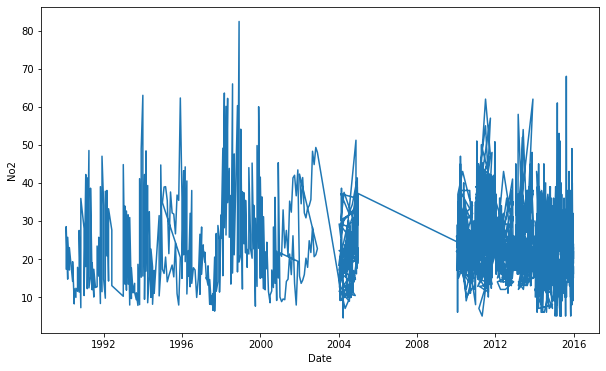

In [6]:
#plot graph

plt.xlabel("Date")
plt.ylabel("No2")
plt.plot(indexedDataset)